In [22]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [23]:
url = 'Online-Retail-France.xlsx'
X = pd.read_excel(url)

X.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0


In [24]:
X.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
394,539607,21137,BLACK RECORD COVER FRAME,4,2010-12-20 14:10:00,3.75,12681.0
5173,566816,23171,REGENCY TEA PLATE GREEN,24,2011-09-15 10:53:00,1.65,12731.0
7980,578736,23196,VINTAGE LEAF MAGNETIC NOTEPAD,12,2011-11-25 11:33:00,1.45,12681.0
6804,574252,22630,DOLLY GIRL LUNCH BOX,12,2011-11-03 13:24:00,1.95,12437.0
1954,547892,22661,CHARLOTTE BAG DOLLY GIRL DESIGN,10,2011-03-28 10:15:00,0.85,12669.0
3419,556819,23298,SPOTTY BUNTING,9,2011-06-15 10:21:00,4.95,12682.0
8378,580536,21156,RETROSPOT CHILDRENS APRON,8,2011-12-04 16:07:00,1.95,12490.0
6301,570672,85040A,S/4 PINK FLOWER CANDLES IN BOWL,12,2011-10-11 14:52:00,1.65,12536.0
881,541567,22555,PLASTERS IN TIN STRONGMAN,24,2011-01-19 11:51:00,1.65,12681.0
1814,547327,22976,CIRCUS PARADE CHILDRENS EGG CUP,12,2011-03-22 11:28:00,1.25,12681.0


In [25]:
print(f"the shape of X is {X.shape}")

the shape of X is (8557, 7)


In [26]:
# some data exploration 
Description = X['Description']
print(Description)

Description_values = Description.value_counts()
print(Description_values)

0             ALARM CLOCK BAKELIKE PINK
1             ALARM CLOCK BAKELIKE RED 
2            ALARM CLOCK BAKELIKE GREEN
3       PANDA AND BUNNIES STICKER SHEET
4                      STARS GIFT TAPE 
                     ...               
8552        PACK OF 20 SPACEBOY NAPKINS
8553       CHILDREN'S APRON DOLLY GIRL 
8554      CHILDRENS CUTLERY DOLLY GIRL 
8555    CHILDRENS CUTLERY CIRCUS PARADE
8556      BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 8557, dtype: object
Description
POSTAGE                              311
RABBIT NIGHT LIGHT                    75
RED TOADSTOOL LED NIGHT LIGHT         72
PLASTERS IN TIN WOODLAND ANIMALS      68
PLASTERS IN TIN CIRCUS PARADE         68
                                    ... 
JAZZ HEARTS ADDRESS BOOK               1
JAZZ HEARTS PURSE NOTEBOOK             1
HANGING HEART ZINC T-LIGHT HOLDER      1
DRAWER KNOB CRACKLE GLAZE PINK         1
VICTORIAN SEWING BOX LARGE             1
Name: count, Length: 1565, dtype: int64


In [27]:
print(Description.unique().shape) # this is correct 
print(len(Description_values)) # don't know what 

(1565,)
1565


In [28]:
X['Description'] = X['Description'].str.strip()
print(f"after cleaning, the number of unique description values is {len(X['Description'].unique())}")

after cleaning, the number of unique description values is 1564


In [29]:
# null rows with respect to InvoiceNo 
X[X['InvoiceNo'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


In [30]:
# removing rows with nulls entry for InvoiceNo
X.dropna(axis=0, subset = ['InvoiceNo'], inplace = True)
print(f"after cleaning we have {X.shape[0]} rows")

after cleaning we have 8557 rows


In [31]:
# drop all row where InvoiceNo start by C
print(f"there are {sum(X['InvoiceNo'].astype(str).str.contains('C'))} rows such that the element in InoiceNo start with C")

there are 149 rows such that the element in InoiceNo start with C


In [32]:
X = X[X['InvoiceNo'].str.contains('C') == False]

In [33]:
print(f"after cleaning, there are {sum(X['InvoiceNo'].astype(str).str.contains('C'))} rows where InvoiceNo contains C")

after cleaning, there are 0 rows where InvoiceNo contains C


In [34]:
# remove POSTAGE rows 
container = 'Description'
target = 'POSTAGE'
print(f"there are {sum(X[container].astype(str).str.contains(target))} rows where Description contains POSTAGE")
X = X[X[container].astype(str).str.contains(target) == False]
print(f"after cleaning, there are {sum(X[container].astype(str).str.contains(target))} rows where Description contains POSTAGE")


there are 300 rows where Description contains POSTAGE
after cleaning, there are 0 rows where Description contains POSTAGE


In [35]:
X.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
count,8108,8108,8108,8108.000000,8108,8108.000000,8042.000000
unique,387,1541,1562,NaN,388,NaN,NaN
top,570672,23084,RABBIT NIGHT LIGHT,NaN,2011-10-11 14:52:00,NaN,NaN
freq,259,74,74,NaN,259,NaN,NaN
mean,NaN,NaN,NaN,13.724593,NaN,3.839639,12679.898533
std,NaN,NaN,NaN,21.353250,NaN,66.583173,281.236979
min,NaN,NaN,NaN,1.000000,NaN,0.000000,12413.000000
25%,NaN,NaN,NaN,6.000000,NaN,1.000000,12571.000000
50%,NaN,NaN,NaN,10.000000,NaN,1.650000,12674.000000
75%,NaN,NaN,NaN,12.000000,NaN,2.950000,12689.000000


In [36]:
# create basket
basket = X.groupby(['InvoiceNo', 'Description'])['Quantity']\
    .sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
basket.describe()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,...,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.868217,0.310078,0.005168,0.062016,0.509044,0.385013,0.400517,0.062016,0.281654,0.186047,...,0.193798,0.023256,0.010336,0.002584,0.082687,0.279070,0.012920,0.186047,0.031008,0.062016
std,5.109242,2.474110,0.101666,0.861544,5.445138,2.978173,3.454711,1.219989,2.006660,1.484466,...,2.195417,0.340644,0.203331,0.050833,1.626651,2.348994,0.254164,1.922464,0.609994,0.861544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,48.000000,20.000000,2.000000,12.000000,96.000000,24.000000,48.000000,24.000000,24.000000,12.000000,...,25.000000,6.000000,4.000000,1.000000,32.000000,36.000000,5.000000,24.000000,12.000000,12.000000


In [38]:
# transform in boolean values (True, False) before applying the apriori algorithm 
def encode_units(x):
    if x <= 0:
        return False
    if x >= 1:
        return True
 
basket_sets = basket.map(encode_units) # apply the function to basket's items 
basket_sets.describe()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
count,387,387,387,387,387,387,387,387,387,387,...,387,387,387,387,387,387,387,387,387,387
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,375,381,386,385,381,380,380,386,378,381,...,384,385,386,386,386,380,386,383,386,385


In [48]:
step = 0.01
min_support = 1
min_rules = 20
metric = 'lift'
min_threshold = 1
while True:
    # compute frequent itemset
    frequent_itemsets = apriori(basket_sets, min_support=min_support, use_colnames=True)
    if frequent_itemsets.shape[0]>0:
        # discover rules 
        rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)
    if frequent_itemsets.shape[0] >0 and rules.shape[0]>=min_rules:
        break
    else:
        min_support -= step

In [49]:
print(f"min_support = {min_support}, metric = {metric}, min_treshold = {min_threshold}, \
    number of frequent_itemsets = {frequent_itemsets.shape[0]}, number of rules = {rules.shape[0]}") 

min_support = 0.07999999999999925, metric = lift, min_treshold = 1,     number of frequent_itemsets = 41, number of rules = 20


In [50]:
rules 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.095607,0.098191,0.080103,0.837838,8.532717,0.070716,5.561154,0.976129
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.098191,0.095607,0.080103,0.815789,8.532717,0.070716,4.909561,0.978926
2,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN SPACEBOY),0.170543,0.139535,0.090439,0.530303,3.800505,0.066643,1.831958,0.888385
3,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE),0.139535,0.170543,0.090439,0.648148,3.800505,0.066643,2.357405,0.856371
4,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.170543,0.173127,0.103359,0.606061,3.500678,0.073834,2.098986,0.861215
5,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.173127,0.170543,0.103359,0.597015,3.500678,0.073834,2.058283,0.863906
6,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.139535,0.173127,0.105943,0.759259,4.385572,0.081786,3.434705,0.897165
7,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.173127,0.139535,0.105943,0.611940,4.385572,0.081786,2.217352,0.933613
8,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.134367,0.139535,0.103359,0.769231,5.512821,0.084610,3.728682,0.945672
9,(SET/6 RED SPOTTY PAPER CUPS),(SET/20 RED RETROSPOT PAPER NAPKINS),0.139535,0.134367,0.103359,0.740741,5.512821,0.084610,3.338870,0.951351


In [51]:
sorted_rules = rules.sort_values(by = ['lift', 'confidence'], ascending = False)
sorted_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.095607,0.098191,0.080103,0.837838,8.532717,0.070716,5.561154,0.976129
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.098191,0.095607,0.080103,0.815789,8.532717,0.070716,4.909561,0.978926
16,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.103359,0.129199,0.100775,0.975000,7.546500,0.087421,34.832041,0.967487
17,(SET/6 RED SPOTTY PAPER PLATES),"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",0.129199,0.103359,0.100775,0.780000,7.546500,0.087421,4.075640,0.996196
14,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.103359,0.139535,0.100775,0.975000,6.987500,0.086353,34.418605,0.955664


<Axes: title={'center': 'Association Rules'}, xlabel='lift', ylabel='confidence'>

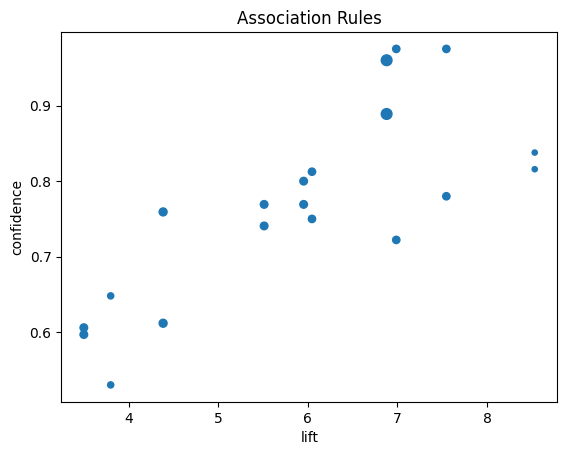

In [52]:
sorted_rules.plot.scatter(x='lift',y='confidence',s=3**(sorted_rules['support']*30),title='Association Rules')

<Axes: title={'center': 'Association Rules (dot proportional to Lift)'}, xlabel='support', ylabel='confidence'>

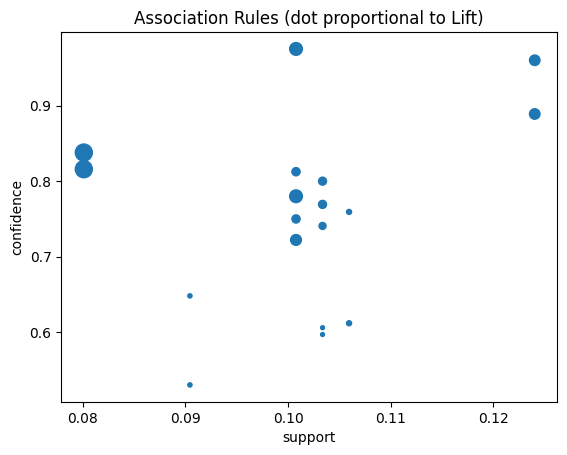

In [53]:
s = [1.8**n for n in rules.lift]
rules.plot.scatter(x='support', 
                   y='confidence', 
                   title='Association Rules (dot proportional to Lift)', 
                   s=s)